## SNN models with depression

### Imports

In [1]:
# Public imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Private imports
from SNNs.Default_SNN import SNN
from Modelling.Training import Train_Model

### Load data from file

In [4]:
def generate_synthetic_data(num_samples, input_size):
    X = np.random.rand(num_samples, input_size)
    y = np.random.randint(0, 2, num_samples)
    return X, y

X, y = generate_synthetic_data(100000, 784)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
# Get data from txt
sentences = []
labels = []
with open("Emotion_data/test.txt", 'r', encoding="utf-8") as test:
    for line in test:
        separated = line.split(";")
        sentences.append(separated[0])
        labels.append(separated[1].replace("\n", ""))

# Print functions for tests:
print(f"Length texts: {len(sentences)}, texts examples: {sentences}")
print(f"Length label: {len(labels)}, label example: {labels}")
print(f"Unique values: {set(labels)}")

Length texts: 984, texts examples: ['im feeling rather rotten so im not very ambitious right now', 'im updating my blog because i feel shitty', 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her', 'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived', 'i was feeling a little vain when i did this one', 'i cant walk into a shop anywhere where i do not feel uncomfortable', 'i felt anger when at the end of a telephone call', 'i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the masters program at the university of virginia', 'i like to have the same breathless feeling as a reader eager to see what will happen next', 'i jest i feel grumpy tired and pre menstrual which i probably am but then again its only been a week and im about as fit as a walrus on vacation 

### Encode Data

In [3]:
# For Text conversion to matrixes of TF-IDF features
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
X = vectorizer.fit_transform(sentences).toarray()

# Label Encoder for emotion selection
label_encoder = LabelEncoder()
y_temporal = label_encoder.fit_transform(labels)
print(y_temporal)

y = np.zeros((y_temporal.size, 6))
y[np.arange(y_temporal.size), y_temporal] = 1

print(f"Feature Matrix:\n{X.shape[1]}")
# print(f"Encoded Labels:\n{y}")

# split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'sentences' is not defined

### Train Default Model for comparison

In [5]:
# Train created model
print(f"Unique values of X_train: {np.unique(X_train)}")
default = SNN(input_size=len(X_train[0]), hidden_size=len(np.unique(y_train)), output_size=len(np.unique(y_train)))
default.train(X_train, y_train, X_val, y_val, epochs=100, learning_rate=0.01)

Unique values of X_train: [2.57731136e-09 4.41474779e-09 1.05533239e-08 ... 9.99999948e-01
 9.99999951e-01 9.99999999e-01]


/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:57: RuntimeWarning: overflow encountered in cosh
  return 1 / (self.phi * np.cosh((V - self.V3) / (2 * self.V4)))
/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:123: RuntimeWarning: divide by zero encountered in divide
  return (self.w_inf(V) - W) / self.tau_w(V)
/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:131: RuntimeWarning: invalid value encountered in add
  self.W = self.W + dt * self.dW(self.V, self.W)
/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:70: RuntimeWarning: invalid value encountered in multiply
  return self.gCa * self.m_inf(V) * (V - self.VCa)


Epoch 0, Loss: nan, Accuracy: 0.9999875
Epoch 1, Loss: nan, Accuracy: 1.0
Epoch 2, Loss: nan, Accuracy: 1.0
Epoch 3, Loss: nan, Accuracy: 1.0
Epoch 4, Loss: nan, Accuracy: 1.0
Epoch 5, Loss: nan, Accuracy: 1.0
Epoch 6, Loss: nan, Accuracy: 1.0
Epoch 7, Loss: nan, Accuracy: 1.0
Epoch 8, Loss: nan, Accuracy: 1.0
Early stopping at epoch 9


In [3]:
# More tests
model = SNN(input_size=3014, hidden_size=100, output_size=10)
# print(f"X vals: {X_train} \nY vals: {y_train}")
Train_Model(model, X_train, y_train).train()
# Train_Model(model, encoded_texts, spike_trains).train()

/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:57: RuntimeWarning: overflow encountered in cosh
  return 1 / (self.phi * np.cosh((V - self.V3) / (2 * self.V4)))
/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:123: RuntimeWarning: divide by zero encountered in divide
  return (self.w_inf(V) - W) / self.tau_w(V)
/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:131: RuntimeWarning: invalid value encountered in add
  self.W = self.W + dt * self.dW(self.V, self.W)
/workspaces/Depression-in-SNN/SNNs/Morris_Lecar_Neuron.py:70: RuntimeWarning: invalid value encountered in multiply
  return self.gCa * self.m_inf(V) * (V - self.VCa)


Epoch 1/10, Loss: nan, Accuracy: 0.9969512195121951
Epoch 2/10, Loss: nan, Accuracy: 1.0
Epoch 3/10, Loss: nan, Accuracy: 1.0
Epoch 4/10, Loss: nan, Accuracy: 1.0
Epoch 5/10, Loss: nan, Accuracy: 1.0
Epoch 6/10, Loss: nan, Accuracy: 1.0
Epoch 7/10, Loss: nan, Accuracy: 1.0
Epoch 8/10, Loss: nan, Accuracy: 1.0
Epoch 9/10, Loss: nan, Accuracy: 1.0
Epoch 10/10, Loss: nan, Accuracy: 1.0


### Load Models

In [ ]:
# Loading default trained model
weights = np.load("Results/NormalSNN.npz")
default.fc1_weights = weights["fc1_weights"]
default.fc2_weights = weights["fc2_weights"]

Unique values in Training Loss: {np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)}


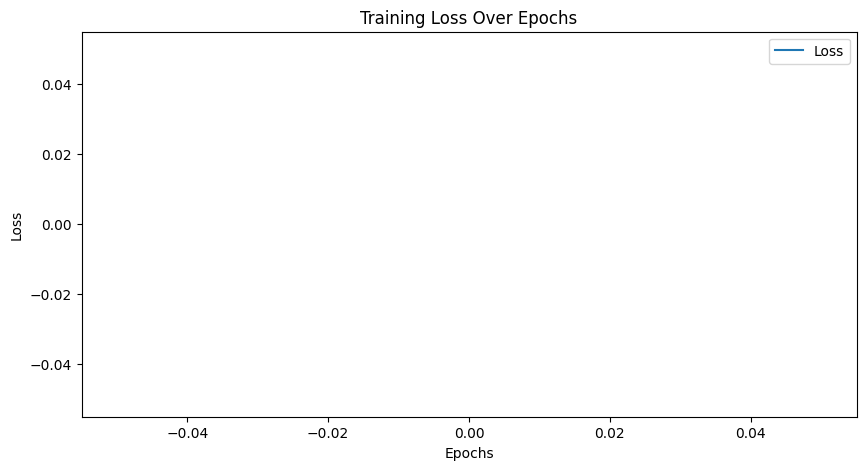

In [6]:
# Load recorded loss data
loss_history = np.load('Results/NormalSNN/loss_history.npy') 

print(f"Unique values in Training Loss: {set(loss_history)}")
epochs = np.arange(len(loss_history))
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_history, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

Unique values in Accuracy: {np.float64(0.9999875), np.float64(1.0)}


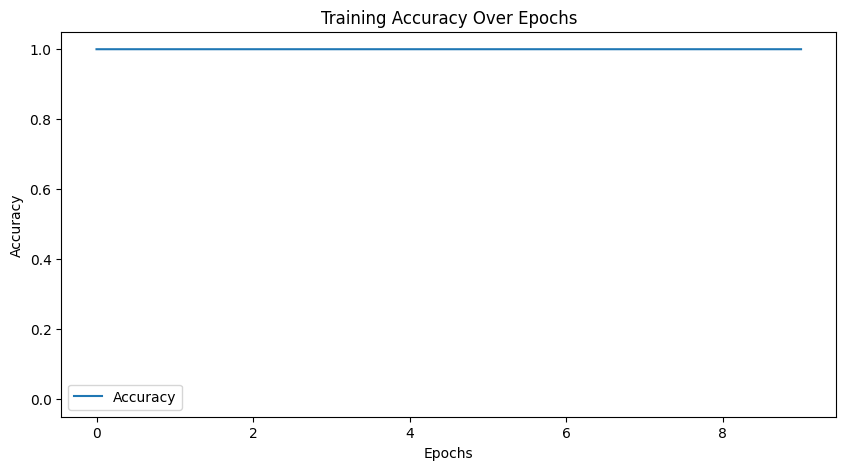

In [7]:
# Load recorded accuracy data
accuracy_history = np.load('Results/NormalSNN/accuracy_history.npy') 

print(f"Unique values in Accuracy: {set(accuracy_history)}")
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy_history, label='Accuracy')
plt.ylim(-0.05, 1.05)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()


In [6]:
# Load recorded spike activity data
spike_record = np.load('spike_record.npy') 

plt.figure(figsize=(10, 5))
plt.imshow(spike_record, cmap='binary', aspect='auto')
plt.title('Spike Activity')
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'spike_record.npy'

In [ ]:
# Load recorded membrane potential data
membrane_potential = np.load('membrane_potential.npy') 

plt.figure(figsize=(10, 5))
plt.plot(membrane_potential)
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Morris-Lecar Neuron Dynamics')
plt.show()
